# Atividade 4

Amanda Topanotti Zanette (22100776)

**Importações e funções auxiliares**

In [3]:
using LinearAlgebra, Plots, Printf

function print_matrix(M, decimals::Int=4)
  for i in 1:size(M, 1)
    for j in 1:size(M, 2)
      @printf("%*.*f ", 10, decimals, M[i, j])
    end
    println()
  end
end

print_matrix (generic function with 2 methods)

O seguinte código é necessário apenas para garantir que o código gere os mesmos números aleatórios.

In [ ]:
using Random
Random.seed!(123)

## Parte 1

### Questão 1

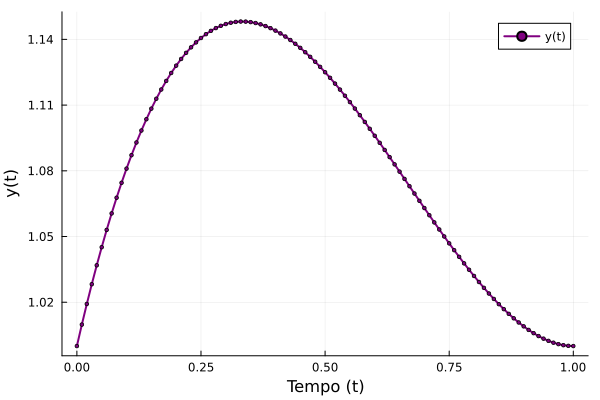

In [7]:
y(t) = 1 + t - 2t^2 + t^3

t_values = range(0, 1, length=101)

y_values = y.(t_values)

plot(t_values, y_values,
     xlabel="Tempo (t)",
     ylabel="y(t)",
     label="y(t)",
     marker=:circle,
     color=:purple,
     markersize=2,
     linewidth=2)


### Questão 2

In [8]:
epsilon = 1e-2 * randn(length(t_values))
y_noisy = y_values + epsilon

101-element Vector{Float64}:
 0.9909245811940541
 1.0100559745249458
 1.017890127325547
 1.007903511123623
 1.0049923784418962
 1.0353549922180982
 1.0562668686285552
 1.0629374229638713
 1.0696670435316604
 1.074397742658597
 1.067667958411802
 1.0627908282793634
 1.0971383847645573
 ⋮
 1.0084206523063257
 1.0119130679619053
 1.006097118649311
 0.9943274545061307
 0.9839167227339444
 1.001539600344156
 1.0081007908337367
 1.0143147094441038
 1.0151042397092622
 0.9864603738020313
 1.011203274590103
 0.9913512870193733

### Questão 3

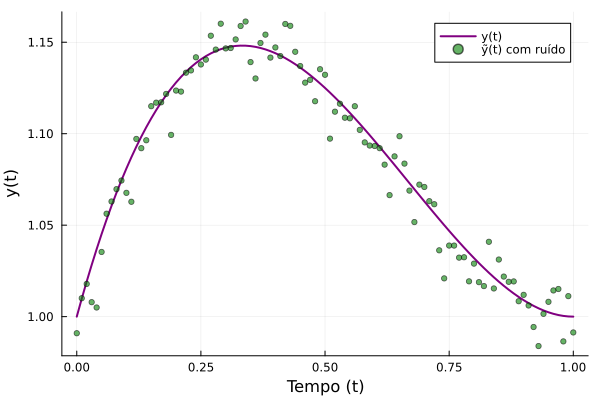

In [13]:
p1 = plot(t_values, y_values,
          label="y(t)",
          linewidth=2,
          color=:purple,
          xlabel="Tempo (t)",
          ylabel="y(t)")

scatter!(p1, t_values, y_noisy,
         label="ỹ(t) com ruído",
         markersize=3,
         color=:green,
         alpha=0.6)


### Questão 4

A matriz $A \in \mathbb{R}^{m\times4}$ tem posto igual a 4, ou seja, $A$ tem posto completo.

In [21]:
A = [ones(length(t_values)) t_values t_values.^2 t_values.^3]
b = y_noisy

sigma = svd(A).S #ARRUMAR ISSO SVD
rank = count(x -> x > 1e-10, sigma)

print("posto(A) = ",rank)

posto(A) = 4

### Questão 5

In [24]:
Q, R = qr(A) # arrumarrrrrrrrrrrrrrrr
x_qr = R \ (Matrix(Q)' * b)
x_normal = (A'A) \ (A'b)

println("Solução x': ", round.(x_qr, digits=4))

Solução x': [0.9878, 1.0931, -2.2015, 1.1234]


### Questão 6

### Questão 7

## Parte 2

### Questão 1
